### Mapping the Monterey Bay
Goal Produce two maps:
    1. Larger Montery Bay with color
    2. Closer inserts over the canyon with bathymetry

Coastal relief:
   [Bathy data source](http://maps.ngdc.noaa.gov/viewers/wcs-client/) - grid extractor
<br> Helpful tutorials:
[introtopython.org](http://introtopython.org/visualization_earthquakes.html)

Tips: 
    1. Use low resolution map w/o bathy for troubleshooting markers/text, will save tons of time

In [1]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip
from matplotlib import cm, rcParams
from netCDF4 import Dataset as NetCDFFile

In [2]:
# import bouy data
data = pd.read_csv('data/bouy_locations.txt',header=0)
lat_markers = data['latitude']
lon_markers = data['longitude']
marker_name = data['short_name']

In [3]:
# Load coastal relief data
nc = NetCDFFile('data/mb_coastal.nc')
lats = nc.variables['lat'][:]
lons = nc.variables['lon'][:]
elv = nc.variables['Band1'][:]

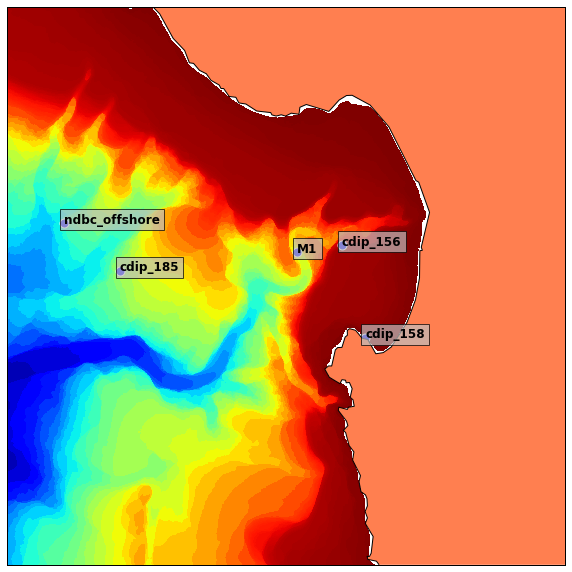

In [7]:
fig = plt.figure(figsize=(12,6))
fig.set_size_inches(10,10)
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=90000,height=90000,
            resolution='h',projection='stere',
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
# Plot Data
lower = np.arange(-500,0,10)
upper = np.arange(-3200,-500,100)
cont = np.concatenate([upper,lower])

cs = m.contourf(xi,yi,elv,cont)
# Add Grid Lines


# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')

#Add station markers
x, y = m(lon_markers.tolist(), lat_markers.tolist())
m.scatter(x, y, marker='o',edgecolor='w',s=80)
# Add Colorbar

for i in range(len(lat_markers)):
    plt.text(x[i], y[i], marker_name[i],fontsize=12,fontweight='bold',color='k',bbox=dict(facecolor='0.75', alpha=0.7))

plt.show()